In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from sklearn.preprocessing import MinMaxScaler

# Dataset Ground Truth

In [16]:
# Loading the dataset
csv_metrics = pd.read_csv("http://vod.icomp.ufam.edu.br/video_dataset/csvs_metrics/video_quality.csv")
csv_metrics = csv_metrics.drop(['LPIPS','VMAF'], axis=1)
csv_metrics.head()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,34560000,153140.4,23,30,37.830948,0.841709
1,34560000,70482.2,29,30,34.691950,0.768763
2,34560000,48405.0,32,30,33.236920,0.723732
3,34560000,116526.4,26,30,36.754460,0.787863
4,34560000,72227.2,30,30,34.758755,0.737197


In [3]:
def bytesTobits(x):
    return x*8

In [5]:
#Multiply the bitrate for 8
csv_metrics['BITRATE'] = csv_metrics['BITRATE'].apply(lambda x: bytesTobits(x))
csv_metrics.head()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,34560000,1225123.2,23,30,37.830948,0.841709
1,34560000,563857.6,29,30,34.691950,0.768763
2,34560000,387240.0,32,30,33.236920,0.723732
3,34560000,932211.2,26,30,36.754460,0.787863
4,34560000,577817.6,30,30,34.758755,0.737197


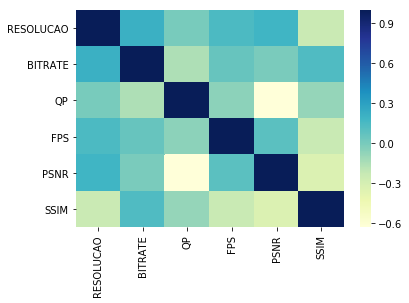

In [4]:
sns.heatmap(csv_metrics.corr(), cmap="YlGnBu")

In [6]:
csv_metrics.describe()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
count,2.640000e+03,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000
mean,1.269982e+08,1.321944e+06,30.744318,27.136364,34.964979,0.517834
std,9.675599e+07,4.188533e+06,4.492359,2.997467,3.940023,0.184661
min,2.764800e+07,2.230080e+04,14.000000,24.000000,20.241417,0.061618
25%,5.529600e+07,3.111084e+05,28.000000,24.000000,32.148144,0.400593
50%,9.417600e+07,6.543960e+05,31.000000,30.000000,34.807460,0.539559
75%,1.658880e+08,1.371574e+06,34.000000,30.000000,37.671411,0.656716
max,3.110400e+08,1.681524e+08,44.000000,30.000000,49.370070,0.930759


In [ ]:

def createDataFrame(csv_metrics, csv_pd):
    for j in range(csv_metrics):
        csv_pd["RESOLUCAO"] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
        csv_pd[""] = csv_metrics[j][]
    

In [ ]:
COLUNAS = [
    'Coluna-1',
    'Coluna-2',
    'Coluna-3',
    'Coluna-4'
]

df_csv = pd.DataFrame()
df = createDataFrame(csv_metrics, df_csv):

In [13]:
csv_metrics.groupby(csv_metrics["RESOLUCAO"]).count()

,BITRATE,QP,FPS,PSNR,SSIM
RESOLUCAO,,,,,
27648000,315,315,315,315,315
34560000,345,345,345,345,345
62208000,315,315,315,315,315
77760000,345,345,345,345,345
110592000,315,315,315,315,315
138240000,345,345,345,345,345
248832000,315,315,315,315,315
311040000,345,345,345,345,345


# Data Transformation